<a href="https://colab.research.google.com/github/parthasarathydNU/gen-ai-coursework/blob/main/cnn-intro/building_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

Classify CIFAR 10 images with a CNN model and study the effect on the performance by varying the following modeling aspects:
1. Batch Normalization
2. Dropout
3. Number of convolution and pooling layers
4. Activation functions

## Reference Notebook:

TensorFlow's tutorial on building CNNs : https://www.tensorflow.org/tutorials/images/cnn

### Goals:
In this notebook we will be learning how to build, train and classify image datasets using a simple CNN.

We will be using tensorflow and keras.

#### Using available data from tensorflow

- datasets: This refers to the various datasets that are available in TensorFlow Keras, such as MNIST, CIFAR-10, and ImageNet. These datasets are used for training and evaluating machine learning models

- layers: This refers to the different types of layers that can be used to build a neural network model, such as Dense, Conv2D, and MaxPooling2D.

- models: This refers to the different types of models that can be built using TensorFlow Keras, such as Sequential and Functional


We will be using the CIFAR-10 dataset: The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes are:

["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

In [ ]:
# Importing required libraries
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


The dataset is divided into 50,000 training images and 10,000 testing images. The training and testing images are further divided into five batches of 10,000 images each.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


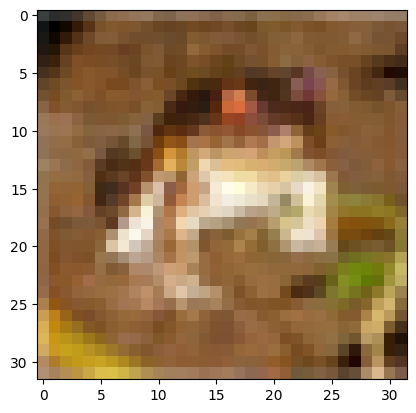

In [ ]:
# View the first image from the dataset
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

# Looks like some animal? ALso looks like a face

In [ ]:
# Here we see that while the images are images, the labels are 2D arrays
train_labels, test_labels

(array([[6],
        [9],
        [9],
        ...,
        [9],
        [1],
        [1]], dtype=uint8),
 array([[3],
        [8],
        [8],
        ...,
        [5],
        [1],
        [7]], dtype=uint8))

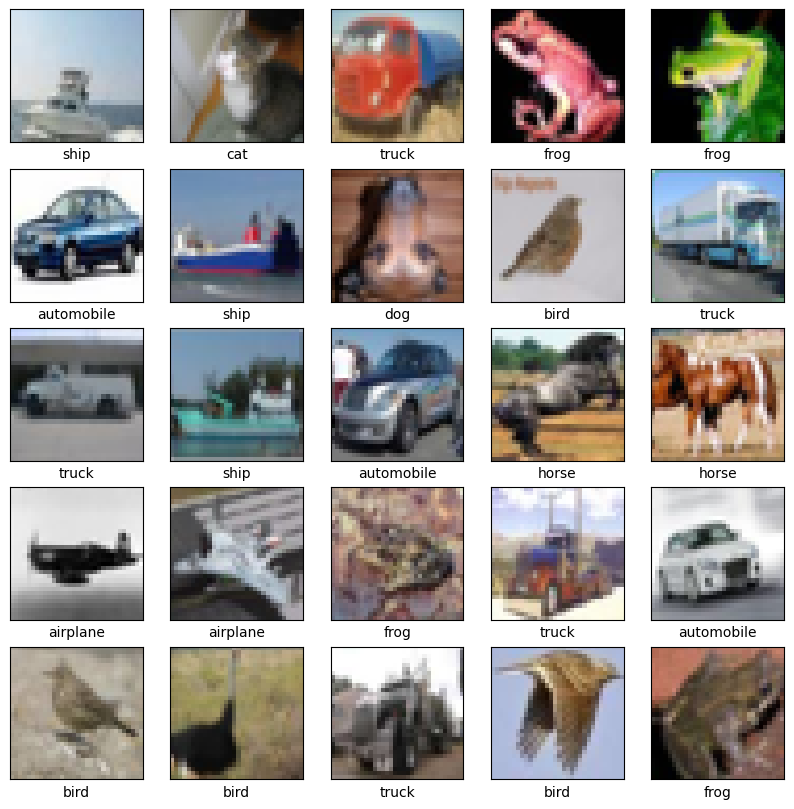

In [ ]:
# To verify the data looks correct, we plot the first 25 imags along with the class names below the image

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(100, 125):
    plt.subplot(5,5,i - 100 +1) # subplot(nrows, ncols, index)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) # this plots the image as is, this is not an issue
    plt.xlabel(class_names[train_labels[i][0]]) # We try to plot the name that corresponds to that training label



In [ ]:
# Looks good so far the images seem to match the descriptions of the training labels.

# Looking at the shape of each image
train_images.shape

(50000, 32, 32, 3)

### Creating the convolutional base

The pattern we use here is common pattern : Conv2D and MaxPooling 2D layers.

It is important for us to be able to visualize what is happening here so we can understand intuitively what goes on within the network.

This CNN takes an input of size (image_height, image_width, color_channels) for each image in the batch.

Above we see that each image in the training dataset is of shape (32, 32, 3). Let's build our model accordingly.



In [ ]:
# Documentation abotu the various methods used here
# https://keras.io/api/layers/convolution_layers/convolution2d/
# https://keras.io/api/layers/pooling_layers/max_pooling2d/

"""
keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
"""

convolution_layer_1 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))



### Understanding the above line of code

Here we are trying to build one layer that has the following properties.

- 32 filters: This means that the layer will apply 32 different filters to the input data. Each filter will extract a specific feature from the input data
- (3,3) kernel size: this means that each filter will be a 3x3 matrix of weights
- relu activation: The output of the layer will be passed through a rectified linear unit activation function
- innput shape (32, 32, 3) : This means that the input data to the layer will be 32x32 color images with 3 chanels 9 RGB

The purpose of this layer is to extract features from the input images such as edges, corners and textures.

The output of this will be a map with 32 chanels where each chanel represents a different feature. This layer is typically used as the first layer in a convolutional neural network (CNN). CNNs are a type of deep learning model that is specifically designed for processing data that has a grid-like structure, such as images.




## Trying to visualize one layer

To visualize the operation and effects of a convolutional layer in a CNN, it's helpful to create a model with the specified properties and then use an example image to see how the layer transforms the input.

- **Define the Convolutional Layer:** This layer will have 32 filters with a kernel size of (3,3), use ReLU activation, and expect an input shape of (32, 32, 3).

- **Apply the Layer to an Example Image:** You can use a sample image or generate random data that matches the input shape.

- **Visualize the Output:** For each of the 32 output channels, visualize the result to see how different features are extracted by different filters.

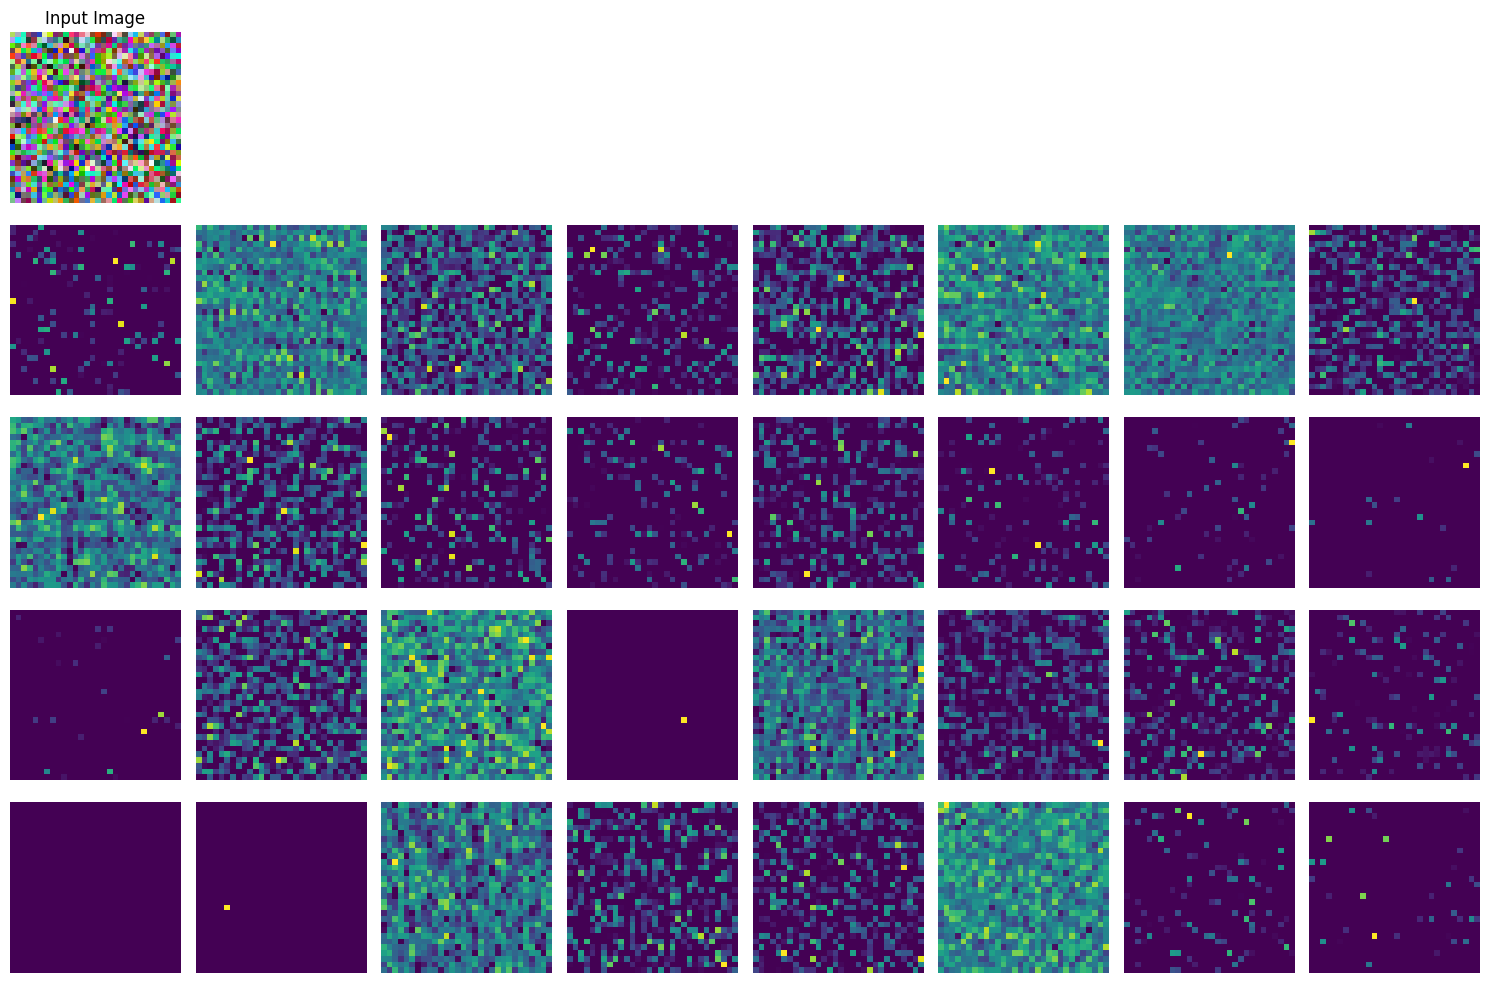

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the convolutional layer
conv_layer = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(32, 32, 3)
)

# Create a random image of shape (32, 32, 3)
input_image = np.random.random((1, 32, 32, 3))

# Apply the convolutional layer to the image
output_features = conv_layer(input_image)

# Convert the output to a numpy array for visualization
output_features = output_features.numpy()


# Visualize the input image
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(15, 10))  # Adjust the grid size to accommodate the input image
axes[0, 0].imshow(input_image[0], cmap='viridis')
axes[0, 0].set_title('Input Image')
axes[0, 0].axis('off')

# Merge the first row, except the first column, for symmetry
for i in range(1, 8):
    fig.delaxes(axes[0, i])

"""
ax.imshow(output_features[0, :, :, i], cmap='viridis'):

output_features[0, :, :, i]:
This part selects a single feature map from the output of the convolutional layer.
Here, output_features is a 4D array where the dimensions represent:
- 0     : This is the index of the first (and in this case, only) image in the batch.
          Since we passed only one image, we use 0 to select it.
- `:,:` : These two slices select all the rows and columns of the feature map,
          meaning it selects the entire spatial dimension of the feature map.
- i.    : This is the index of the current filter's output being visualized.
          Since there are 32 filters, i varies from 0 to 31, allowing you to visualize the
          output from each filter.

- cmap='viridis': This argument specifies the colormap used to display the image.
                  The 'viridis' colormap is a popular choice for displaying single-channel
                  (grayscale) images in a way that is perceptually uniform and translates well
                  to black-and-white printing.
"""

# Visualize the outputs of the 32 filters
for i, ax in enumerate(axes.flat[8:]):  # Start plotting from the second row
    ax.imshow(output_features[0, :, :, i], cmap='viridis')
    ax.axis('off')

plt.tight_layout()
plt.show()
